In [1]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

senic_df = pd.read_csv('./senic_train.csv')

senic_df.head()

,infection_risk,stay_length,age,culture_ratio,chest_ratio,bed_count,med_school,nurses_per_bed,capacity_ratio,region_1,region_2,region_3,region_4
0,2.9,10.80,63.9,1.6,57.4,130,2,0.476923,0.530769,0,0,1,0
1,4.9,11.07,53.2,28.5,122.0,768,1,0.854167,0.769531,1,0,0,0
2,4.0,9.20,52.2,17.5,71.1,298,1,0.791946,0.818792,0,0,0,1
3,5.4,11.18,45.7,60.5,85.8,640,1,0.562500,0.623437,0,1,0,0
4,5.7,11.80,53.8,9.1,116.9,571,1,0.821366,0.772329,0,1,0,0


In [2]:
senic_columns = senic_df.columns

y = 'infection_risk'
x = " + ".join([i for i in senic_columns if  i != y])

In [3]:
fit = ols(y + '~' + x, 
            data=senic_df).fit()

print(fit.summary())

senic_df['resids'] = fit.resid
senic_df['sq_resids'] = fit.resid**2
stud_res = fit.outlier_test()
senic_df['studentized_resids'] = stud_res['student_resid']
senic_df['yhat'] = fit.predict()


                            OLS Regression Results                            
Dep. Variable:         infection_risk   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     12.40
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           2.42e-12
Time:                        15:43:49   Log-Likelihood:                -88.680
No. Observations:                  79   AIC:                             201.4
Df Residuals:                      67   BIC:                             229.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.5936      1.458     -3.

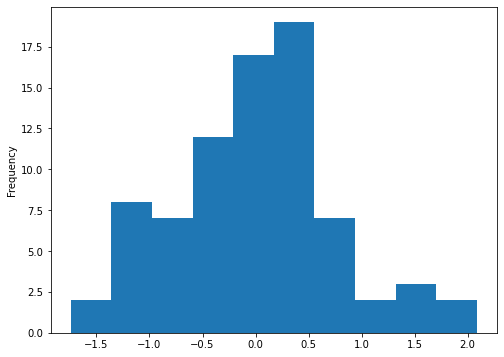

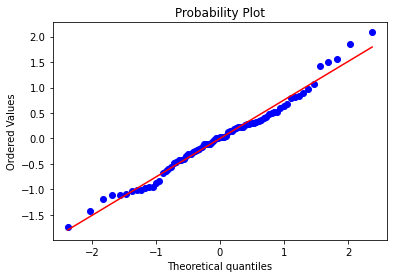

Shapiro Statistic: 0.983
Data appears to be normal with p-value: 0.394


In [4]:


def residual_plots(x, y, xlabel, ylabel, loess=True, frac=0.5):

#     plt.scatter(x, y)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    if loess == True:
        sm_x, sm_y = sm_lowess(y, x,  frac=frac, 
                               it=2, return_sorted = True).T
        plt.plot(sm_x, sm_y, color='tomato')
        plt.plot(x, y, 'k.')
    
    
def normality_output(data):
    shapiro_output = stats.shapiro(data)
    shapiro_stat = shapiro_output[0]
    shapiro_p = shapiro_output[1]
    print("Shapiro Statistic: {:.3f}".format(shapiro_stat))
    if shapiro_p < 0.05:
        print('Data is non-normal with p-value: {:.5f}'.format(shapiro_p))
    else:
        print('Data appears to be normal with p-value: {:.3f}'.format(shapiro_p))
        
        
    return shapiro_output

### Test normality of residuals!

plt.figure(figsize=(8, 6))

senic_df['resids'].plot(kind='hist');

fig = plt.figure()
ax1 = fig.add_subplot(111)
prob = stats.probplot(senic_df['resids'], dist=stats.norm, plot=ax1)
plt.show();

shapiro_stats = normality_output(senic_df['resids'])




## Raw Residual Plots

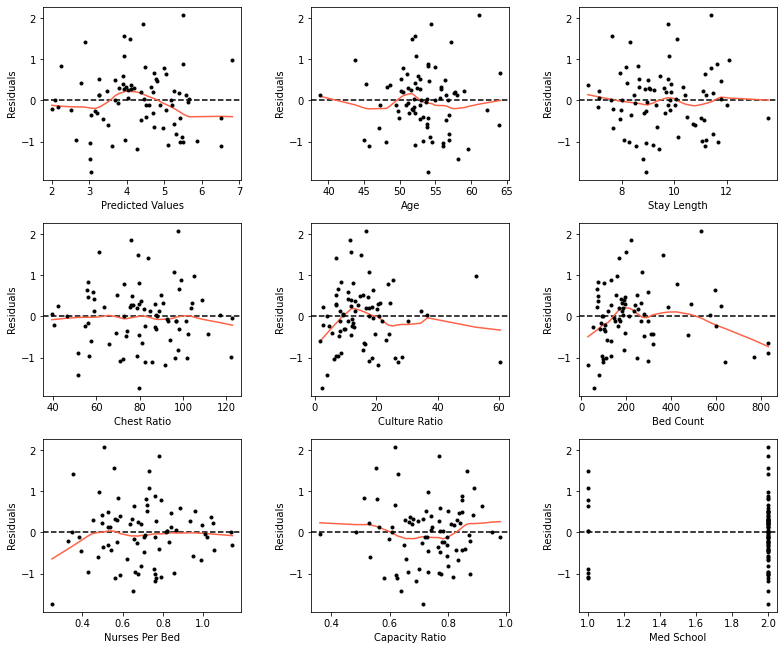

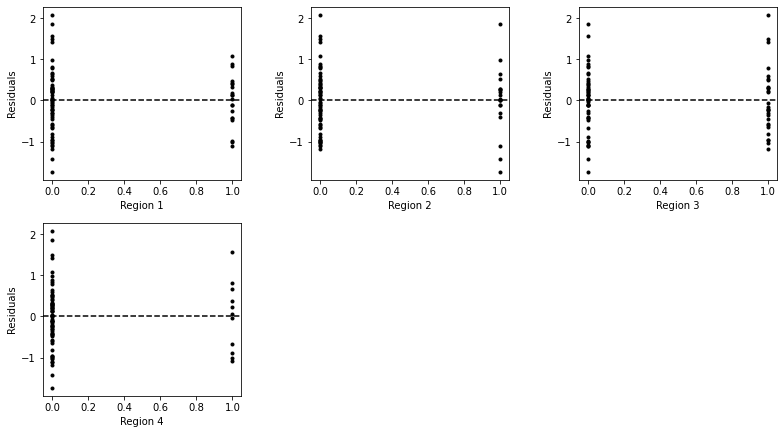

In [5]:
plt.figure(figsize=(12, 10))

resid_type = 'resids'
resid_title = 'Residuals'

plt.subplot(331)
residual_plots(senic_df['yhat'], senic_df[resid_type], 'Predicted Values', resid_title)
plt.subplot(332)
residual_plots(senic_df['age'], senic_df[resid_type], 'Age', resid_title)
plt.subplot(333)
residual_plots(senic_df['stay_length'], senic_df[resid_type], 'Stay Length', resid_title)
plt.subplot(334)
residual_plots(senic_df['chest_ratio'], senic_df[resid_type], 'Chest Ratio', resid_title)
plt.subplot(335)
residual_plots(senic_df['culture_ratio'], senic_df[resid_type], 'Culture Ratio', resid_title)
plt.subplot(336)
residual_plots(senic_df['bed_count'], senic_df[resid_type], 'Bed Count', resid_title)
plt.subplot(337)
residual_plots(senic_df['nurses_per_bed'], senic_df[resid_type], 'Nurses Per Bed', resid_title)
plt.subplot(338)
residual_plots(senic_df['capacity_ratio'], senic_df[resid_type], 'Capacity Ratio', resid_title)
plt.subplot(339)
residual_plots(senic_df['med_school'], senic_df[resid_type], 'Med School', resid_title)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(331)
residual_plots(senic_df['region_1'], senic_df[resid_type], 'Region 1', resid_title)
plt.subplot(332)
residual_plots(senic_df['region_2'], senic_df[resid_type], 'Region 2', resid_title)
plt.subplot(333)
residual_plots(senic_df['region_3'], senic_df[resid_type], 'Region 3', resid_title)
plt.subplot(334)
residual_plots(senic_df['region_4'], senic_df[resid_type], 'Region 4', resid_title)



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Squared Residuals

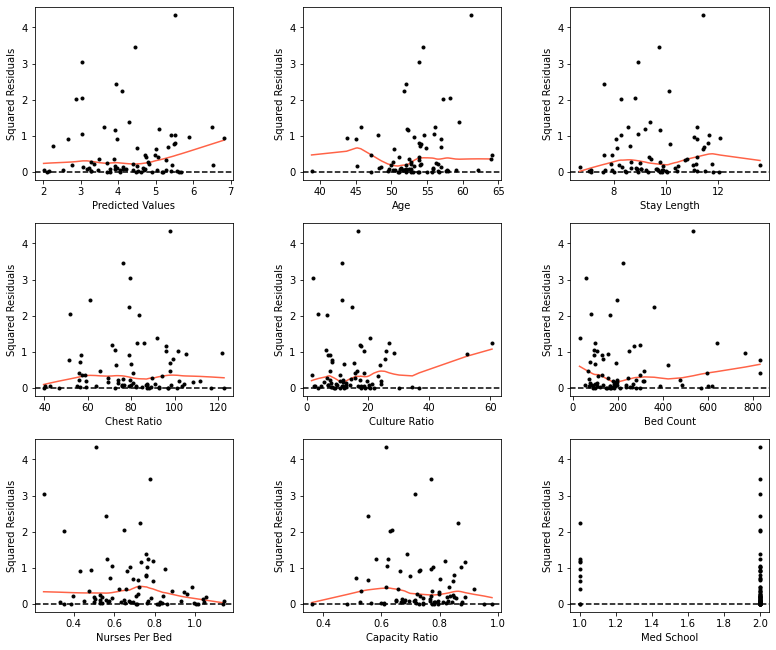

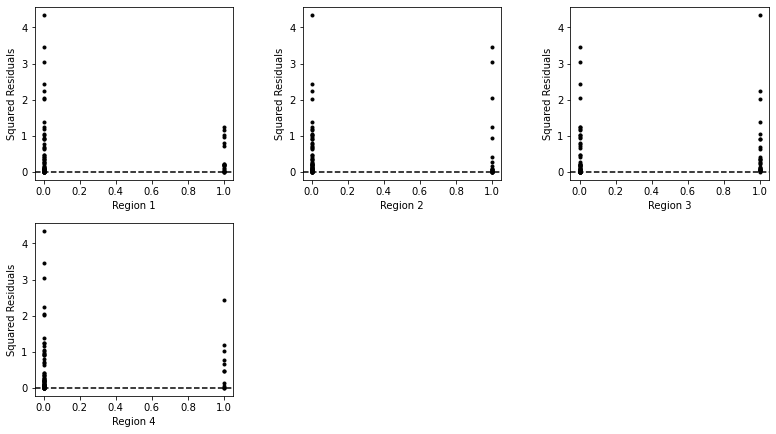

In [6]:
plt.figure(figsize=(12, 10))

resid_type = 'sq_resids'
resid_title = 'Squared Residuals'

plt.subplot(331)
residual_plots(senic_df['yhat'], senic_df[resid_type], 'Predicted Values', resid_title)
plt.subplot(332)
residual_plots(senic_df['age'], senic_df[resid_type], 'Age', resid_title)
plt.subplot(333)
residual_plots(senic_df['stay_length'], senic_df[resid_type], 'Stay Length', resid_title)
plt.subplot(334)
residual_plots(senic_df['chest_ratio'], senic_df[resid_type], 'Chest Ratio', resid_title)
plt.subplot(335)
residual_plots(senic_df['culture_ratio'], senic_df[resid_type], 'Culture Ratio', resid_title)
plt.subplot(336)
residual_plots(senic_df['bed_count'], senic_df[resid_type], 'Bed Count', resid_title)
plt.subplot(337)
residual_plots(senic_df['nurses_per_bed'], senic_df[resid_type], 'Nurses Per Bed', resid_title)
plt.subplot(338)
residual_plots(senic_df['capacity_ratio'], senic_df[resid_type], 'Capacity Ratio', resid_title)
plt.subplot(339)
residual_plots(senic_df['med_school'], senic_df[resid_type], 'Med School', resid_title)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(331)
residual_plots(senic_df['region_1'], senic_df[resid_type], 'Region 1', resid_title)
plt.subplot(332)
residual_plots(senic_df['region_2'], senic_df[resid_type], 'Region 2', resid_title)
plt.subplot(333)
residual_plots(senic_df['region_3'], senic_df[resid_type], 'Region 3', resid_title)
plt.subplot(334)
residual_plots(senic_df['region_4'], senic_df[resid_type], 'Region 4', resid_title)



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Studentized Residuals

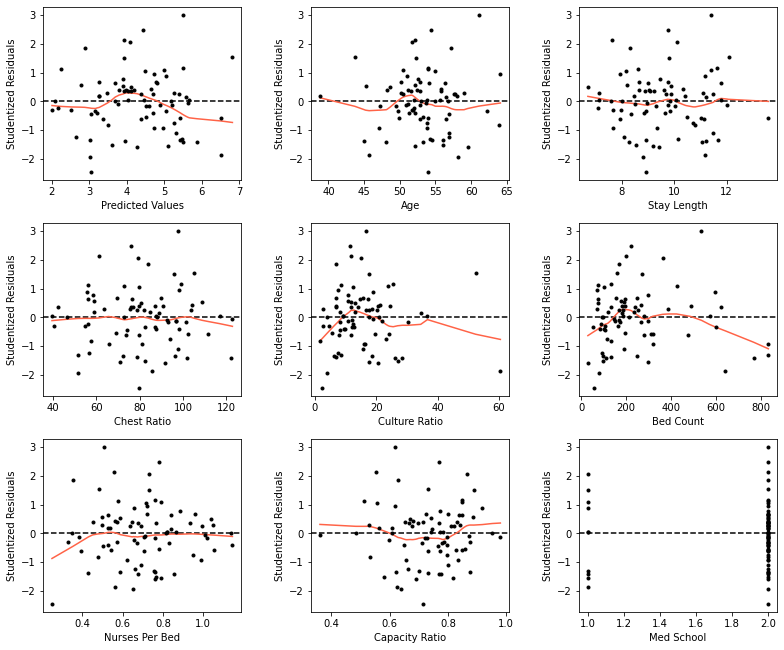

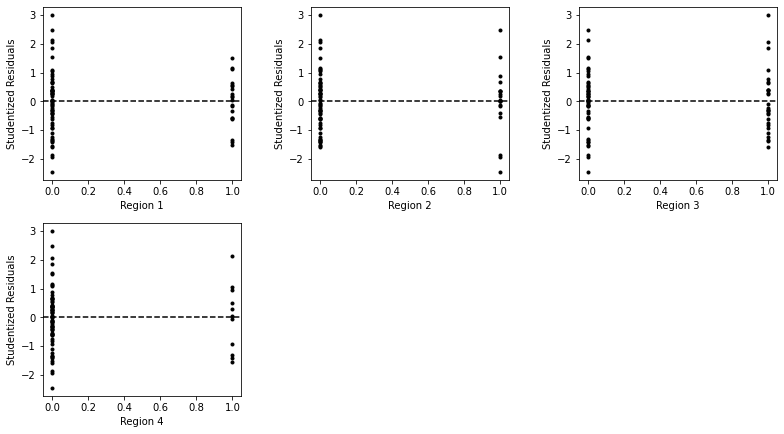

In [7]:
plt.figure(figsize=(12, 10))


resid_type = 'studentized_resids'
resid_title = 'Studentized Residuals'

plt.subplot(331)
residual_plots(senic_df['yhat'], senic_df[resid_type], 'Predicted Values', resid_title)
plt.subplot(332)
residual_plots(senic_df['age'], senic_df[resid_type], 'Age', resid_title)
plt.subplot(333)
residual_plots(senic_df['stay_length'], senic_df[resid_type], 'Stay Length', resid_title)
plt.subplot(334)
residual_plots(senic_df['chest_ratio'], senic_df[resid_type], 'Chest Ratio', resid_title)
plt.subplot(335)
residual_plots(senic_df['culture_ratio'], senic_df[resid_type], 'Culture Ratio', resid_title)
plt.subplot(336)
residual_plots(senic_df['bed_count'], senic_df[resid_type], 'Bed Count', resid_title)
plt.subplot(337)
residual_plots(senic_df['nurses_per_bed'], senic_df[resid_type], 'Nurses Per Bed', resid_title)
plt.subplot(338)
residual_plots(senic_df['capacity_ratio'], senic_df[resid_type], 'Capacity Ratio', resid_title)
plt.subplot(339)
residual_plots(senic_df['med_school'], senic_df[resid_type], 'Med School', resid_title)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(331)
residual_plots(senic_df['region_1'], senic_df[resid_type], 'Region 1', resid_title)
plt.subplot(332)
residual_plots(senic_df['region_2'], senic_df[resid_type], 'Region 2', resid_title)
plt.subplot(333)
residual_plots(senic_df['region_3'], senic_df[resid_type], 'Region 3', resid_title)
plt.subplot(334)
residual_plots(senic_df['region_4'], senic_df[resid_type], 'Region 4', resid_title)



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

## Residual analysis

Some definite bowing of residuals, however I am not overly concerned regarding heteroscadascity, will perform a breusch pagan test to confirm

No outliers were noticed in the studentized residuals we are seeing some curvilinear relationships in Bed Count in the studentized residuals

## Breusch Pagan

Null Hypothesis: Homoscedasticity is present
Alternative Hypothesis: Homoscedasticity is not present

Because p > 0.05 we fail to reject the null hypothesis and conclude there is not enough evidence that heteroscadacity is present


In [8]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 12.8082566045203),
 ('p-value', 0.3831301693873991),
 ('f-value', 1.1786051037371041),
 ('f p-value', 0.31861019407382624)]

## Multicollinearity

In [24]:
x = " + ".join([i for i in senic_columns if  i != y and 'region_' not in i])
_, exog = dmatrices(y + '~' + x, data=senic_df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(exog.values, i) for i in range(exog.shape[1])]
vif_df['variable'] = exog.columns
print(vif_df.sort_values(by='VIF',ascending=False))
# anything greater than 5! is considered high VIF


          VIF        variable
0  357.559716       Intercept
1    1.749076     stay_length
3    1.675167   culture_ratio
5    1.517186       bed_count
6    1.511026      med_school
4    1.407132     chest_ratio
8    1.374083  capacity_ratio
2    1.249941             age
7    1.157050  nurses_per_bed


In [11]:
x

'stay_length + age + culture_ratio + chest_ratio + bed_count + med_school + nurses_per_bed + capacity_ratio + region_1 + region_2 + region_3 + region_4'